In [1]:
import numpy as np
from numpy import ndarray as arr
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pickle
from pathlib import Path

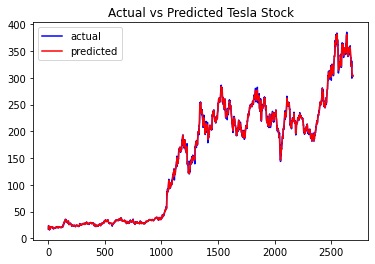

In [13]:
data = np.array(pd.read_csv("stocks/tsla.csv"))


data[:, 0] = data[:, 0].astype(np.datetime64).astype(np.int64)
data[:, 0] -= np.min(data[:, 0])

x = data[:, [0]].astype(np.int64)
y = data[:, 4].astype(np.float64)

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(x, y)


plt.figure(1)
plt.plot(x, y, color="blue", label="actual")
plt.plot(x, regressor.predict(x), color="red", label="predicted")
plt.title("Actual vs Predicted Tesla Stock")
plt.legend()
plt.show()


In [31]:

for file in Path("stocks").glob("**/*"):
    pd_data: pd.DataFrame = pd.read_csv(file)
    data: arr = np.array(pd_data)
    np.random.shuffle(data)

    data[:, 0] = data[:, 0].astype(np.datetime64).astype(np.int64)
    data[:, 0] -= np.min(data[:, 0])

    x = data[:, [0]].astype(np.int64)
    y = data[:, 4].astype(np.float64)

    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
    # fit the regressor with x and y data
    regressor.fit(x, y)



    with open(f'pretrained/{file.name.removesuffix(".csv")}.pkl','wb') as f:
        pickle.dump(regressor,f)

